In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('cleaned_data.csv')

# Основная информация
print(df.info()) 
print(df.describe())  

# Первые 5 строк
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365 entries, 0 to 1364
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author_type           1365 non-null   object 
 1   url                   1365 non-null   object 
 2   location              1365 non-null   object 
 3   deal_type             1365 non-null   object 
 4   accommodation_type    1365 non-null   object 
 5   price                 1365 non-null   float64
 6   year_of_construction  616 non-null    float64
 7   house_material_type   1365 non-null   object 
 8   living_meters         1365 non-null   float64
 9   floors_count          1365 non-null   int64  
 10  underground           1362 non-null   object 
 11  creation_date         1365 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 128.1+ KB
None
               price  year_of_construction  living_meters  floors_count
count    1365.000000            616.00

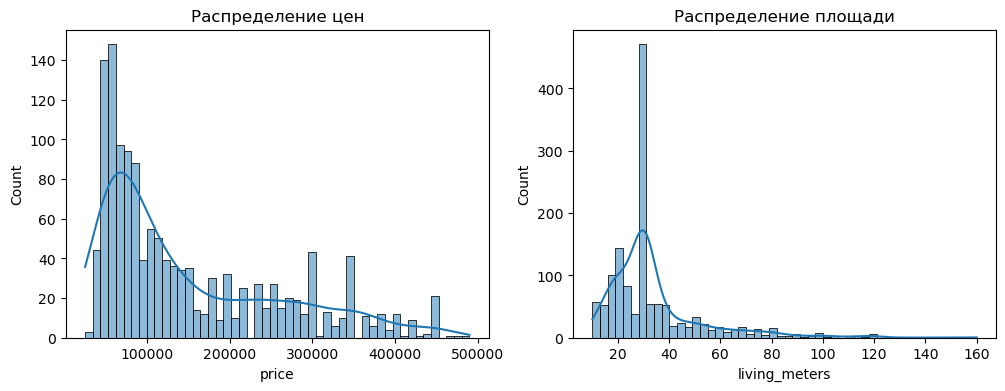

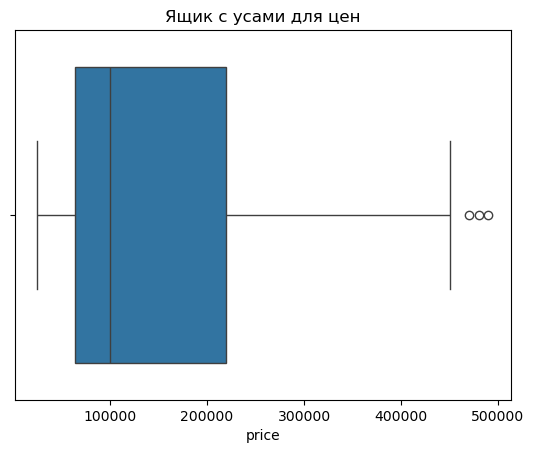

In [7]:
plt.figure(figsize=(12, 4))

# Распределение цен
plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Распределение цен')

# Распределение площади
plt.subplot(1, 2, 2)
sns.histplot(df['living_meters'], bins=50, kde=True)
plt.title('Распределение площади')

plt.show()

sns.boxplot(x=df['price'])
plt.title('Ящик с усами для цен')
plt.show()

### Инсайты:


Модальные значения: чаще всего встречаются квартиры 30–60 м²

Квартиры дороже Q3 + 1.5*IQR — возможные аномалии

## Удаление выбросов

In [9]:
#Q1, Q3 и IQR для цены
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

#Верхняя граница
upper_bound = Q3 + 1.5 * IQR
print(f"Верхняя граница для выбросов: {upper_bound:,.0f} руб")

# Фильтрация данных: оставляем только цены <= upper_bound
df_clean = df[df['price'] <= upper_bound].copy()

# Проверка
print(f"Исходное количество строк: {len(df)}")
print(f"Количество строк после удаления выбросов: {len(df_clean)}")
print(f"Удалено {len(df) - len(df_clean)} выбросов.")

Верхняя граница для выбросов: 454,750 руб
Исходное количество строк: 1365
Количество строк после удаления выбросов: 1362
Удалено 3 выбросов.


### Визуализация до и после (Boxplot)

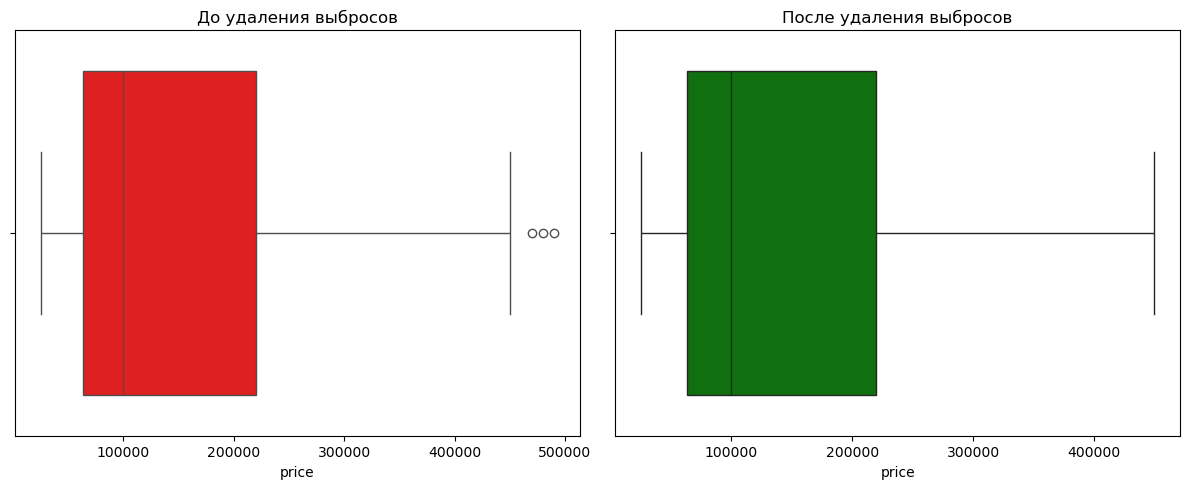

In [10]:
plt.figure(figsize=(12, 5))

# До очистки
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='price', color='red')
plt.title('До удаления выбросов')

# После очистки
plt.subplot(1, 2, 2)
sns.boxplot(data=df_clean, x='price', color='green')
plt.title('После удаления выбросов')

plt.tight_layout()
plt.show()

## Анализ категориальных переменных

### Топ-10 метро по количеству объявлений

               count
Москва-Сити      305
Деловой центр    270
Шелепиха         235
Белорусская       84
Аминьевская       75
Тверская          64
Пушкинская        64
Маяковская        60
Чеховская         59
Курская           57


/var/folders/09/t6tn_wqx1ys2v4vlnpydh_4h0000gn/T/ipykernel_26465/3301283256.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_districts['count'], y=top_districts.index, palette='viridis')


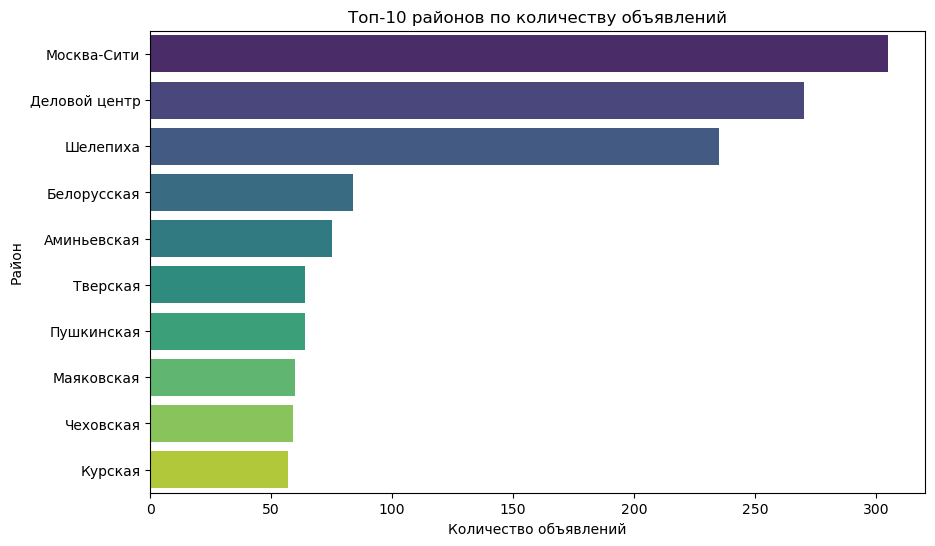

In [14]:
from collections import Counter

all_districts = []
for districts in df_clean['underground'].dropna():
    separated = [d.strip() for d in districts.split(',')]
    all_districts.extend(separated)

# Считаем частоту каждого района
district_counts = Counter(all_districts)


# Разделяем строки и создаем список всех районов
all_districts = []
for districts in df_clean['underground'].dropna():
    separated = [d.strip() for d in districts.split(',')]
    all_districts.extend(separated)

# Считаем частоту каждого района
district_counts = Counter(all_districts)

# Преобразуем в DataFrame для удобства
top_districts = pd.DataFrame.from_dict(district_counts, orient='index', columns=['count'])
top_districts = top_districts.sort_values('count', ascending=False).head(10)

print(top_districts)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_districts['count'], y=top_districts.index, palette='viridis')
plt.title('Топ-10 районов по количеству объявлений')
plt.xlabel('Количество объявлений')
plt.ylabel('Район')
plt.show()

### Расчет средней цены за м² по станциям

In [18]:
df['price_per_m2'] = df['price'] / df['living_meters']

df['underground_list'] = df['underground'].str.split(',').apply(lambda x: [s.strip() for s in x] if isinstance(x, list) else [])

df_exploded = df.explode('underground_list')

avg_price_per_m2 = df_exploded.groupby('underground_list')['price_per_m2'].mean().sort_values(ascending=False)
print(avg_price_per_m2.head(10))

avg_price_per_m2 = df_exploded.groupby('underground_list')['price_per_m2'].mean().sort_values(ascending=False)
print(avg_price_per_m2.head(10))

underground_list
Деловой центр        8755.224359
Москва-Сити          8270.041259
Парк Культуры        7742.512276
Арбатская            7694.913247
Площадь Революции    7671.291789
Лубянка              7612.056921
Поклонная            7595.327009
Кузнецкий мост       7570.329727
Охотный ряд          7501.334964
Третьяковская        7473.518917
Name: price_per_m2, dtype: float64
underground_list
Деловой центр        8755.224359
Москва-Сити          8270.041259
Парк Культуры        7742.512276
Арбатская            7694.913247
Площадь Революции    7671.291789
Лубянка              7612.056921
Поклонная            7595.327009
Кузнецкий мост       7570.329727
Охотный ряд          7501.334964
Третьяковская        7473.518917
Name: price_per_m2, dtype: float64


/var/folders/09/t6tn_wqx1ys2v4vlnpydh_4h0000gn/T/ipykernel_26465/2297915593.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_stations.values, y=top_10_stations.index, palette='rocket')


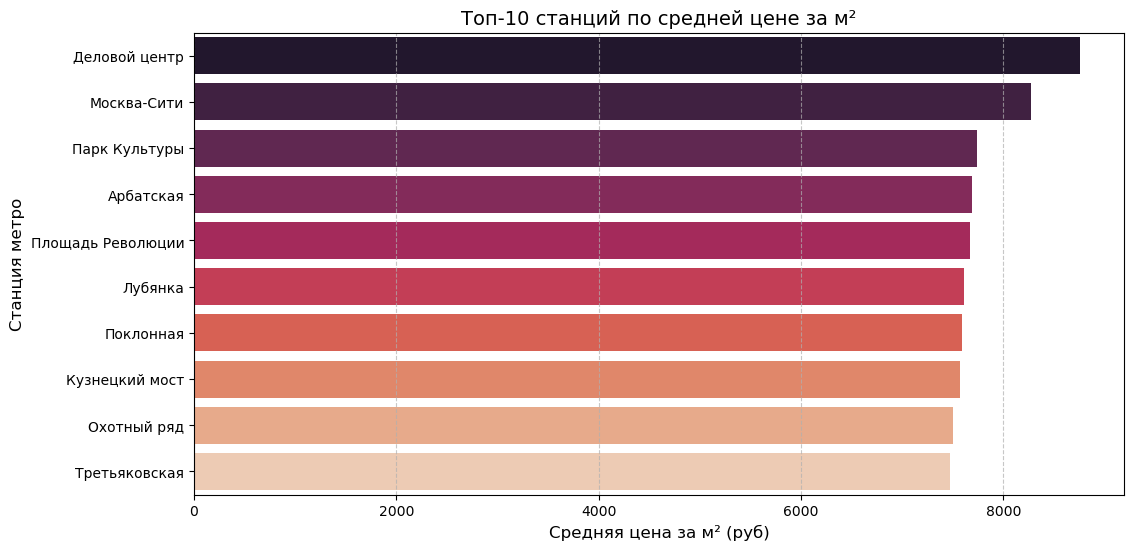

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

top_10_stations = avg_price_per_m2.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_stations.values, y=top_10_stations.index, palette='rocket')
plt.title('Топ-10 станций по средней цене за м²', fontsize=14)
plt.xlabel('Средняя цена за м² (руб)', fontsize=12)
plt.ylabel('Станция метро', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## Зависимости между переменными

Цена vs. Площадь

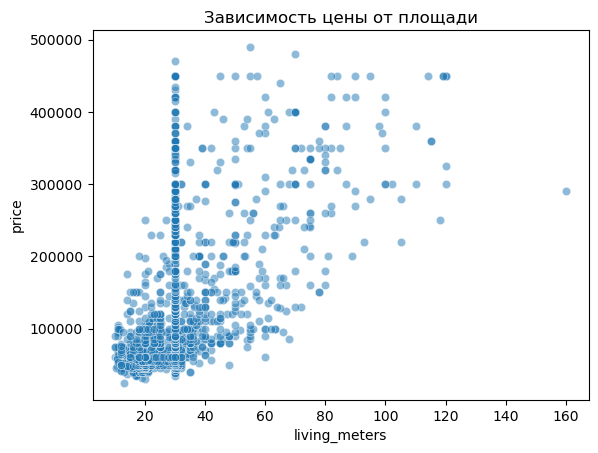

In [20]:
sns.scatterplot(x='living_meters', y='price', data=df, alpha=0.5)
plt.title('Зависимость цены от площади')
plt.show()

Матрица корреляций

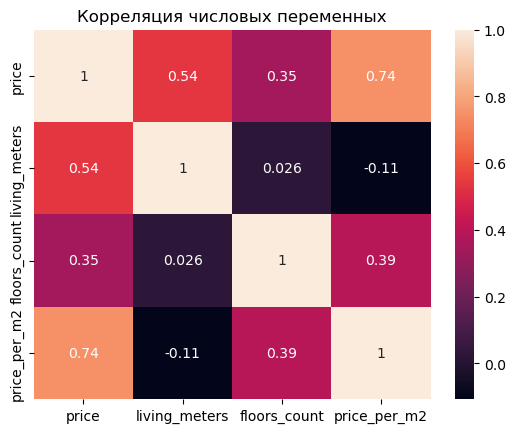

In [23]:
numeric_cols = ['price', 'living_meters', 'floors_count', 'price_per_m2']
sns.heatmap(df[numeric_cols].corr(), annot=True)
plt.title('Корреляция числовых переменных')
plt.show()

## Анализ временных данных

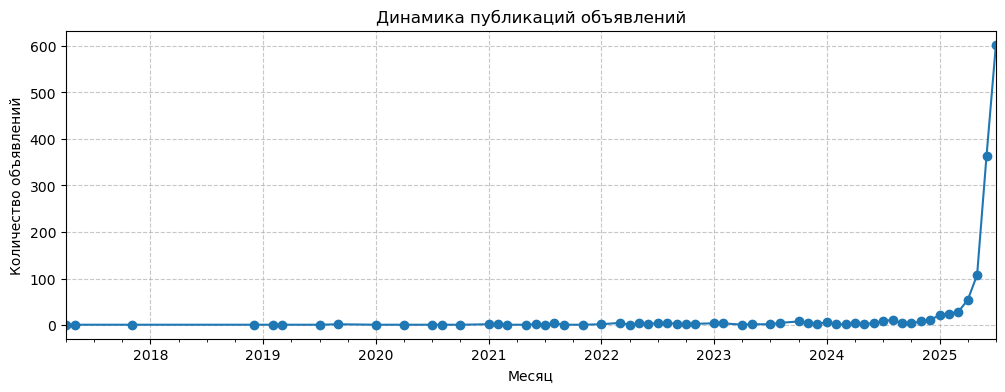

In [25]:
if 'creation_date' in df.columns:

    df['creation_date'] = pd.to_datetime(df['creation_date'], errors='coerce')
    
    df = df.dropna(subset=['creation_date'])
    
    df['month'] = df['creation_date'].dt.to_period('M')
    
    monthly_counts = df['month'].value_counts().sort_index()
    
    plt.figure(figsize=(12, 4))
    monthly_counts.plot(kind='line', marker='o')
    plt.title('Динамика публикаций объявлений')
    plt.xlabel('Месяц')
    plt.ylabel('Количество объявлений')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

## Динамика средней цены по месяцам

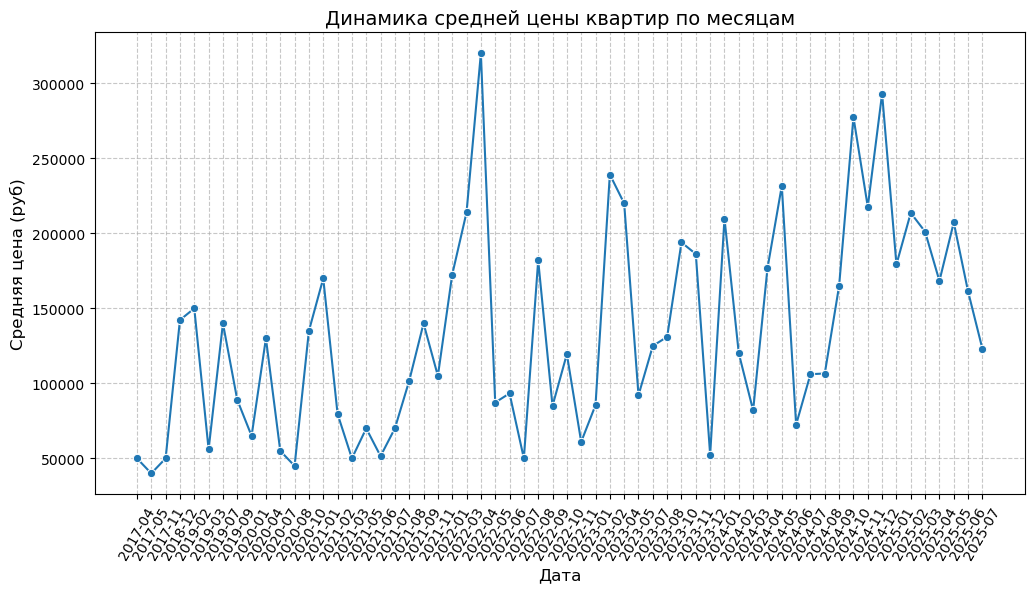

In [28]:
df['year_month'] = df['creation_date'].dt.to_period('M')  # Год-месяц
df['year'] = df['creation_date'].dt.year
df['month'] = df['creation_date'].dt.month

# Группируем по году и месяцу
monthly_avg = df.groupby('year_month')['price'].mean().reset_index()
monthly_avg['year_month'] = monthly_avg['year_month'].astype(str)  # Для визуализации

# Визуализация
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg, x='year_month', y='price', marker='o')
plt.title('Динамика средней цены квартир по месяцам', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Средняя цена (руб)', fontsize=12)
plt.xticks(rotation=60)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

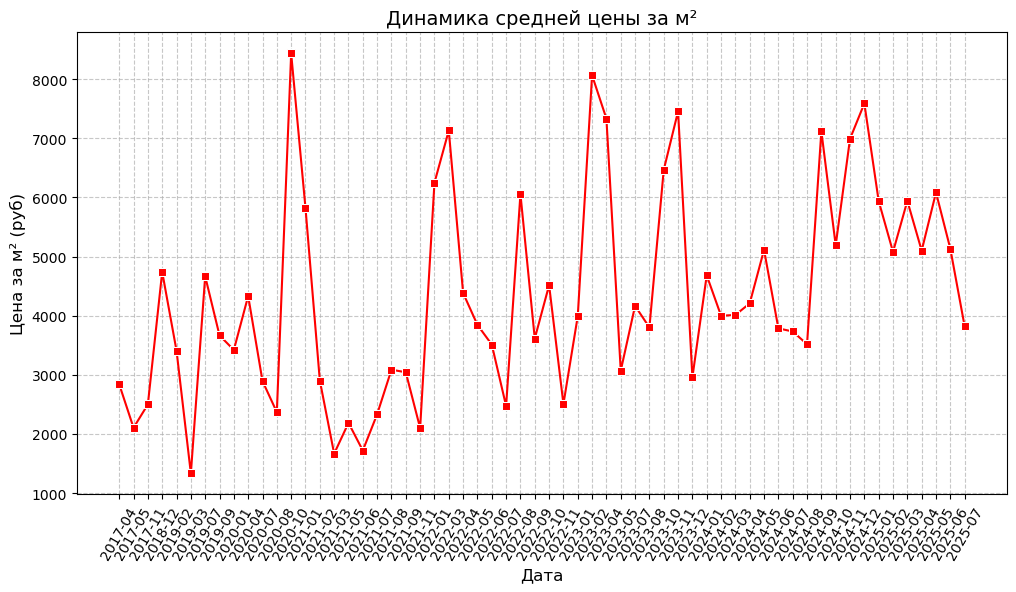

In [30]:
df['price_per_m2'] = df['price'] / df['living_meters']  # Добавляем цену за м²

# Группируем и считаем
monthly_avg_m2 = df.groupby('year_month')['price_per_m2'].mean().reset_index()
monthly_avg_m2['year_month'] = monthly_avg_m2['year_month'].astype(str)

# График
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg_m2, x='year_month', y='price_per_m2', color='red', marker='s')
plt.title('Динамика средней цены за м²', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Цена за м² (руб)', fontsize=12)
plt.xticks(rotation=60)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Анализ сезонности

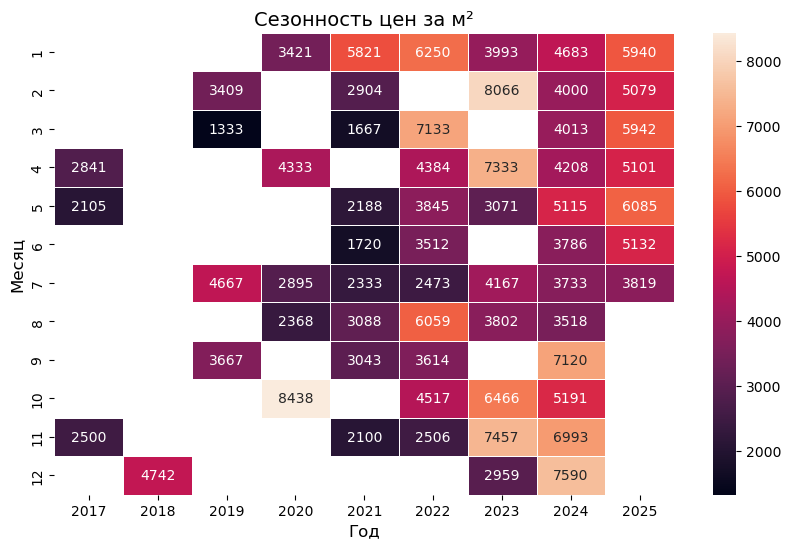

In [32]:
pivot_table = df.pivot_table(
    index='month',
    columns='year',
    values='price_per_m2',
    aggfunc='mean'
)


plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", linewidths=0.5)
plt.title('Сезонность цен за м²', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Месяц', fontsize=12)
plt.show()

In [33]:
df['price_per_m2'] = df['price'] / df['living_meters']  # Цена за м²
df['year_month'] = df['creation_date'].dt.to_period('M')  # Год-месяц
df['year'] = df['creation_date'].dt.year  # Год
df['month'] = df['creation_date'].dt.month  # Месяц
df['day_of_week'] = df['creation_date'].dt.dayofweek  # День недели (0=пн)


df.to_csv('data.csv', index=False, encoding='utf-8')

print(f"Данные сохранены в файл 'data.csv'. Размер: {len(df)} строк.")

Данные сохранены в файл 'data.csv'. Размер: 1365 строк.
